# Wie divers ist die Oper in NRW?

Wir haben per Umfrage und händischer Recherche die Spielpläne aller 13 kommunalen Bühnen in NRW mit Opern im Programm abgefragt und analysiert. Teilweise wurden Daten händisch nachgetragen und bereinigt: [opern_nrw_18_19.csv]('https://raw.githubusercontent.com/wdr-data/starter/main/content/stories/19-06-27_oper/data/opern_nrw_18_19.csv')

Im zweiten Schritt haben wir eine Liste von 40.000 KomponistInnen aus WikiData abgerufen und diese mit unseren Opern-Daten verschnitten, um Geburts- und Sterbejahr und Geschlecht zuzuordnen: [komponisten.wikidata.csv]('https://raw.githubusercontent.com/wdr-data/starter/main/content/stories/19-06-27_oper/data/komponisten.csv')


Falls Ihnen Fehler in den Daten auffallen oder sie uns eine Nachricht schicken möchten, schreiben sie gerne an data@wdr.de.

In [1]:
# Pakete laden 

import pandas as pd
import wptools
import wikidata
import wikipedia
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
import seaborn

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000

from IPython.display import IFrame 

%matplotlib inline 

In [2]:
# Daten einlesen 

df = pd.read_csv('opern_nrw_18_19.csv')

In [3]:
# Zufällige Zeile aus dem Datensatz ansehen

df.sample()

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsdatum,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
114,Theater Krefeld Mönchengladbach,Krefeld/Mönchengladbach,Nabucco,7,Giuseppe Verdi,Giuseppe Verdi,Le Roncole,männlich,1813-10-10 00:00:00+00:00,1813,206,1901,Tot,wiederaufnahmen,NaN


In [4]:
# Wie groß ist der Datensatz?

df.shape

(159, 15)

In [5]:
# Welche Spalten gibt es?

df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsdatum', 'Geburtsjahr', 'Alter',
       'Sterbedatum', 'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [6]:
# Spalten auswählen

df = df[['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter',
       'Sterbedatum', 'Verstorben', 'Art', 'Bemerkung']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
Spielstätte      159 non-null object
Ort              159 non-null object
Titel            159 non-null object
Anzahl           159 non-null int64
Komponist        146 non-null object
Komponist_ber    159 non-null object
Geburtsort       158 non-null object
Geschlecht       159 non-null object
Geburtsjahr      159 non-null int64
Alter            159 non-null int64
Sterbedatum      159 non-null int64
Verstorben       159 non-null object
Art              159 non-null object
Bemerkung        17 non-null object
dtypes: int64(4), object(10)
memory usage: 17.5+ KB


## Vorab
Vorweg: Wir jammern auf hohem Niveau. Denn alles in allem steht es gut um die Oper in Nordrhein-Westfalen. In der letzten Spielzeit stemmten die **13 kommunalen Bühnen** über **hundert Inszenierungen** – mit insgesamt **mehr als tausend Aufführungen**. In anderen Worten: Opernfreunde hatten im Schnitt jeden Tag die Wahl zwischen **rund drei Opernaufführungen**.

In [442]:
# Gesamtsumme der Aufführungen 

df.Anzahl.sum()

1024

In [443]:
# Anzahl der verschiedenen gespielten Opern

len(df.Titel.unique())

115

In [444]:
# Anzahl der Spielstätten
len(df.Spielstätte.unique())

13

In [445]:
df.Anzahl.sum() / 365

2.8054794520547945

## Zauberflöte vor Hänsel und Gretel

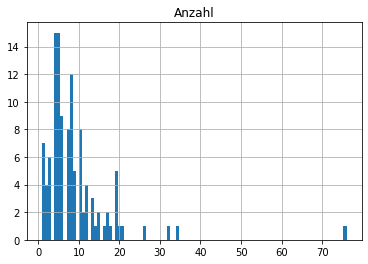

In [99]:
stücke_anzahl.hist(bins=100)
# plt.savefig('./img/stuecke_anzahl_histogram.png')

In [248]:
# Spalten auswählen
stuecke_vs_anzahl = df[['Titel', 'Anzahl']]

In [251]:
# Pivot nach Titel und Summe der Aufführungen
stuecke_vs_anzahl = stuecke_vs_anzahl.pivot_table(index='Titel',aggfunc=['sum'])

In [256]:
# Sortieren nach Anzahl der Aufführungen
stuecke_vs_anzahl = stuecke_vs_anzahl.sort_values([('sum', 'Anzahl')], ascending=False)
stuecke_vs_anzahl.head()

,sum
,Anzahl
Titel,
Die Zauberflöte,76
Hänsel und Gretel,34
La Traviata,32
Das Land des Lächelns,26
Rusalka,21


In [257]:
# Export der Daten, weiter im Datawrapper 
# stuecke_vs_anzahl.to_clipboard()

Waren Sie in der letzten Spielzeit in der Oper? Dann haben Sie höchstwahrscheinlich Papageno, die Knusperhexe oder Leporello auf der Bühne erlebt. Denn diese Opern und Operetten standen am häufigsten auf dem Spielplan:

In [258]:
# Fertige Datawrapper-Grafik
IFrame('//datawrapper.dwcdn.net/azwpu/7/', width='320', height='598')

## Verdi, Mozart, Wagner sind Spitzenreiter
Während lebende KomponistInnen oft nur 1-8 mal aufgeführt werden, werden Komponisten, die über 150 Jahre alt sind besonders häufig aufgeführt. Spitzenreiter sind Guiseppe Verdi und Wolfgang Amadeus Mozart.

In [44]:
# Spalten auswählen 
age_vs_anzahl = df[['Komponist_ber', 'Geburtsjahr', 'Anzahl', 'Verstorben']]

In [56]:
# Daten sortieren anhand Anzahl, Geburtsjahr, Verstorben
age_vs_anzahl = age_vs_anzahl.pivot_table(values=['Anzahl', 'Geburtsjahr', 'Verstorben'], index='Komponist_ber', aggfunc={'Anzahl': 'sum', 'Geburtsjahr': 'min', 'Verstorben': 'min'})

In [57]:
# Anzeigen
age_vs_anzahl.sort_values(by='Anzahl', ascending=False).head()

,Anzahl,Geburtsjahr,Verstorben
Komponist_ber,,,
Giuseppe Verdi,143,1813,Tot
Wolfgang Amadeus Mozart,118,1756,Tot
Richard Wagner,68,1813,Tot
Jacques Offenbach,59,1819,Tot
Giacomo Puccini,43,1858,Tot


In [59]:
# Als .csv speichern, zur Weiterverarbeitung im Datawrapper 
# age_vs_anzahl.to_csv('./csv/age_vs_anzahl.csv')

In [60]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/48hJE/11/', width='320', height='400')

Zu sehen ist das Geburtsjahr im Verhältnis zur Zahl der Aufführungen. Gelbe Quadrate stehen für lebende    KomponistInnen, blaue Punkte für verstorbene. Klicken Sie darauf, um Name, Geburtsjahr und Zahl der Aufführungen zu sehen.

Bei Leonard Bernstein und Jacques Offenbach sieht man, dass die großen Jubiläumsjahre sehr erfolgreich darin waren, diese Komponisten wieder auf die Spielpläne zu setzen. Trotzdem sind die großen Namen meistens Verdi, Mozart, Wagner und Puccini - ihre Opern machen etwa ein Drittel der Aufführungen aus. Giuseppe Verdi führt diese Liste mit Abstand an – seine Opern sind gleich 13 mal inszeniert und insgesamt 143 mal aufgeführt worden.

Zum Beispiel: Claudio Monteverdi war mit 425 Jahren der älteste gespielte Komponist 2018/19. Leonard Evers mit 34 der jüngste.

In [386]:
df.sort_values(by='Alter', ascending=True).head(1)

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
0,Deutsche Oper am Rhein,Düsseldorf/Duisburg,Gold!,7,NaN,Leonard Evers,Heerlen,männlich,1985,34,0,lebt,sonstiges,Premiere oder Wiederaufnahme?


In [446]:
len(set(df[df.Komponist_ber == 'Giuseppe Verdi'].Titel))

13

In [447]:
set(df[df.Komponist_ber == 'Giuseppe Verdi'].Titel)

{'Aida',
 'Die sizilianische Vesper',
 'Don Carlo',
 'Falstaff',
 'Jérusalem',
 'La Traviata',
 'La forza del destino',
 'Luisa Miller',
 'Nabucco',
 'Otello',
 'Rigoletto',
 'Simon Boccanegra',
 'Viva Verdi'}

## Jeder dritte Komponist lebt - wird aber kaum aufgeführt

In [389]:
# Durchschnittsalter (Median) berechnen
composers_age = df[['Komponist_ber', 'Alter']]
composer_age = composers_age[composers_age.Alter.notnull()]
composers_age.Alter.median()

181.0

In [393]:
# Durchschnittsalter (Arithmetisches Mittel) berechnen
composers_age.Alter.mean()

175.88050314465409

In [395]:
# Durchschnittsalter (Mode) berechnen
composers_age.Alter.mode()

0    206
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5ce48cc0>]],
      dtype=object)

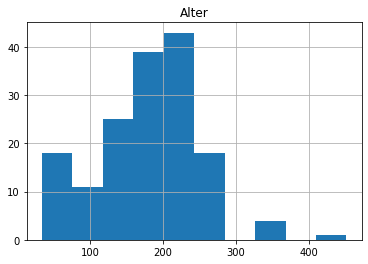

In [396]:
# Werteverteilung für Alter 
composers_age.hist()

Nur 17 der 66 gespielten Komponisten leben noch, das sind 27 Prozent. Schaut man allerdings auf die Gesamtanzahl aller gespielten Aufführungen, dann liegen die lebenden Komponisten bei nur noch 9 Prozent. Ist die Opernwelt im 19. Jahrhundert stehen geblieben?

In [398]:
composers = df[['Titel', 'Komponist_ber', 'Anzahl']]
len(set(composers.Komponist_ber))

66

In [399]:
# Anteil lebend / verstorben Anzeigen
composers_alive = df[['Komponist_ber', 'Verstorben']]
alive = composers_alive[composers_alive.Verstorben == 'lebt']
composers_alive = composers_alive.drop_duplicates()
composers_alive = composers_alive.groupby('Verstorben').count()
composers_alive

,Komponist_ber
Verstorben,
Tot,49
lebt,17


In [400]:
# Prozente berechnen
composers_alive['%']= composers_alive.Komponist_ber.apply(lambda x: round(x / composers_alive.Komponist_ber.sum() * 100))
composers_alive

,Komponist_ber,%
Verstorben,,
Tot,49,74.0
lebt,17,26.0


In [401]:
# Anteil lebend / verstorben an Aufführungen berechnen 
composers_anzahl_verstorben = df[['Komponist_ber', 'Verstorben', 'Anzahl']]
composers_anzahl_verstorben = composers_anzahl_verstorben.groupby('Verstorben').sum()
composers_anzahl_verstorben

,Anzahl
Verstorben,
Tot,929
lebt,95


In [402]:
# Prozente berechnen 
composers_anzahl_verstorben['%'] = composers_anzahl_verstorben.Anzahl.apply(lambda x: round(x / composers_anzahl_verstorben.Anzahl.sum() * 100))
composers_anzahl_verstorben

,Anzahl,%
Verstorben,,
Tot,929,91.0
lebt,95,9.0


In [403]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/6D2bM/4/', width='320', height='303')

## Dortmund, Wuppertal und Düsseldorf/Duisburg sind die lebendigsten Häuser

In [448]:
# Spalten auswählen
häuser_anteil_lebend_composer = df[['Ort', 'Verstorben', 'Komponist_ber']]

In [414]:
# Doppelte Einträge entfernen
häuser_anteil_lebend_composer = häuser_anteil_lebend_composer.drop_duplicates()

In [415]:
# Pivot nach Orten und lebenden KomponistInnen
häuser_anteil_lebend_composer = pd.pivot_table(häuser_anteil_lebend_composer, values='Komponist_ber', index=['Ort'], columns=['Verstorben'], aggfunc='count')
häuser_anteil_lebend_composer

Verstorben,Tot,lebt
Ort,,
Aachen,7.0,NaN
Bielefeld,6.0,1.0
Bonn,9.0,2.0
Dortmund,6.0,3.0
Düsseldorf/Duisburg,16.0,4.0
Essen,10.0,1.0
Gelsenkirchen,10.0,2.0
Hagen,8.0,NaN
Herford,4.0,NaN


In [416]:
# NaN-Werte durch 0 ersetzen
häuser_anteil_lebend_composer = häuser_anteil_lebend_composer.fillna(0)

In [419]:
# Gesamtzahl berechnen 
häuser_anteil_lebend_composer['Gesamt'] = häuser_anteil_lebend_composer.Tot + häuser_anteil_lebend_composer.lebt 

In [420]:
# Prozentsatz berechnen
häuser_anteil_lebend_composer['% tot'] = round(häuser_anteil_lebend_composer.Tot / häuser_anteil_lebend_composer.Gesamt*100)

In [421]:
häuser_anteil_lebend_composer = häuser_anteil_lebend_composer.sort_values('% tot') 
häuser_anteil_lebend_composer

Verstorben,Tot,lebt,Gesamt,% tot
Ort,,,,
Dortmund,6.0,3.0,9.0,67.0
Wuppertal,7.0,2.0,9.0,78.0
Düsseldorf/Duisburg,16.0,4.0,20.0,80.0
Bonn,9.0,2.0,11.0,82.0
Krefeld/Mönchengladbach,9.0,2.0,11.0,82.0
Gelsenkirchen,10.0,2.0,12.0,83.0
Bielefeld,6.0,1.0,7.0,86.0
Köln,15.0,2.0,17.0,88.0
Essen,10.0,1.0,11.0,91.0


In [ ]:
# Daten für Datawrapper exportieren 
# häuser_anteil_lebend_composer.to_clipboard()

In [422]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/Nidhc/3/', width='320', height='471')

## Nuria Núñez Hierro ist die einzige Frau

In [423]:
gender = df[['Komponist_ber', 'Geschlecht']]

In [424]:
gender = gender.drop_duplicates()

In [425]:
gender = gender.groupby('Geschlecht').count()
gender

,Komponist_ber
Geschlecht,
männlich,65
weiblich,1


In [426]:
gender_anzahl = df[['Komponist_ber', 'Geschlecht', 'Anzahl']]
gender_anzahl = gender_anzahl.groupby('Geschlecht').sum()
gender_anzahl

,Anzahl
Geschlecht,
männlich,1016
weiblich,8


In [427]:
# Prozent berechnen 
round((8/1024)*100)

1

In [428]:
# Prozent berechnen 
round((1016/1024)*100)

99

In [429]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/T56o1/2/', width='320', height='316')

## Europa im Zentrum
Beim Blick auf die Herkunft der KomponistInnen liegt das Zentrum weiterhin klar in Europa.

In [430]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [431]:
herkunft = df[['Komponist_ber', 'Geburtsort']]
herkunft.sample()

,Komponist_ber,Geburtsort
90,Charles Gounod,Paris


In [432]:
herkunft.shape

(159, 2)

In [433]:
herkunft = herkunft.drop_duplicates()

In [434]:
herkunft.shape

(66, 2)

In [435]:
# Daten für Datawrapper exportieren 
# herkunft.to_clipboard()

In [436]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/qWU0T/4/', width='320', height='200')

In [437]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/OttGi/1/', width='320', height='200')